In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from auxiliary import plot_boundary, plot_svm_margins

sns.set()

# Support Vector Machines
**Dr. Facundo A. Lucianna - Aprendizaje Automático - CEIoT - FIUBA**

## Clasificación

Para arrancar con el modelo SVM como clasificador (SVC), vamos a arrancar con datos sintéticos. 

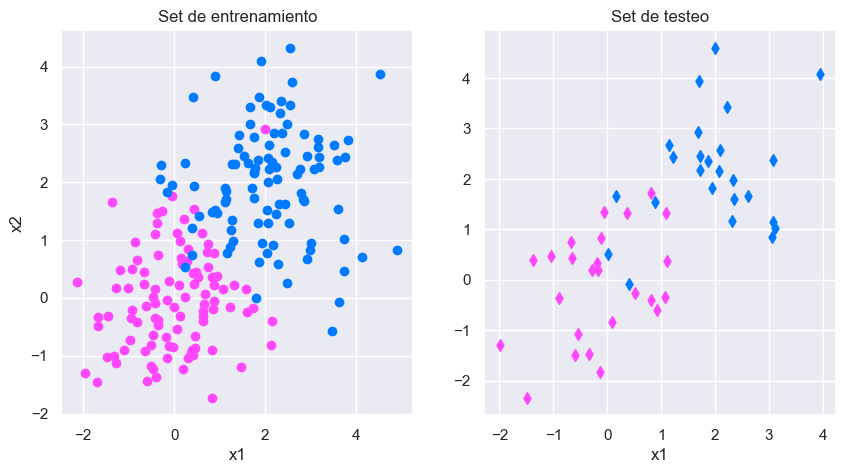

In [2]:
# Aumentamos la cantidad de puntos
rng = np.random.default_rng(seed=42)

X_train = rng.standard_normal((200, 2)) 
y_train = np.array([-1]*100+[1]*100)
# Sumamos 2 a la clase azul para desplazarlo 
X_train[y_train==1] += 2

# Y creamos un set de testeo
X_test = rng.standard_normal((50, 2)) 
y_test = np.array([-1]*25+[1]*25)
# Sumamos 2 a la clase azul para desplazarlo 
X_test[y_test==1] += 2

fig, ax = plt.subplots(1, 2, figsize=(10,5)) 
ax[0].scatter(X_train[:100,0], X_train[:100,1], c="#ff48fd")
ax[0].scatter(X_train[100:,0], X_train[100:,1], c="#007aff")
ax[1].scatter(X_test[:25,0], X_test[:25,1], c="#ff48fd", marker="d")
ax[1].scatter(X_test[25:,0], X_test[25:,1], c="#007aff", marker="d")

ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[1].set_xlabel("x1")

ax[0].set_title("Set de entrenamiento")
ax[1].set_title("Set de testeo");

Creamos un modelo SVC usando [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html), definimos el caso lineal con C=10

In [3]:
from sklearn.svm import SVC

In [4]:
svm_linear = SVC(C=10, kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=10, kernel='linear')

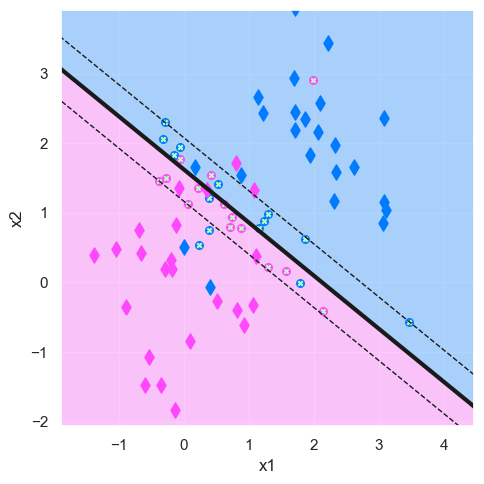

In [5]:
plot_boundary(svm_linear.support_vectors_, y_train[svm_linear.support_], svm_linear, 
              step_x=(0.01, 0.01),
              max_x=(1, 1),
              min_x=(-1.5, -1.5),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=30)

# Grafiquemos los vectores de soporte
plt.scatter(svm_linear.support_vectors_[:,0], svm_linear.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X_train, svm_linear)

# Graficamos el set de testeo
plt.scatter(X_test[:25,0], X_test[:25,1], c="#ff48fd", marker="d", s=60)
plt.scatter(X_test[25:,0], X_test[25:,1], c="#007aff", marker="d", s=60)

plt.tight_layout();

Veamos entrenar el modelo con un parámetro mas chico C=0.005

In [6]:
svm_linear_small = SVC(C=0.005, kernel='linear')
svm_linear_small.fit(X_train, y_train)

SVC(C=0.005, kernel='linear')

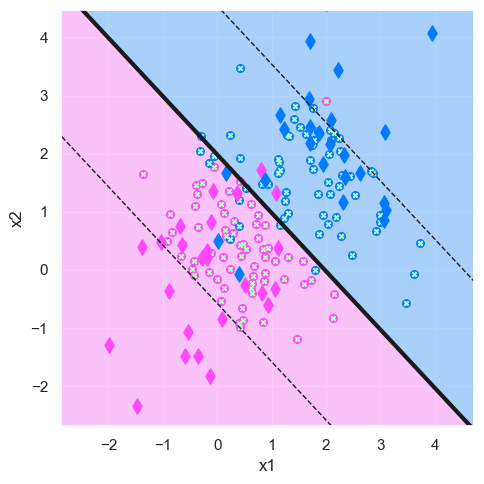

In [7]:
plot_boundary(svm_linear_small.support_vectors_, y_train[svm_linear_small.support_], svm_linear_small, 
              step_x=(0.01, 0.01),
              max_x=(1, 1),
              min_x=(-1.5, -1.5),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=30)

# Grafiquemos los vectores de soporte
plt.scatter(svm_linear_small.support_vectors_[:,0], svm_linear_small.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X_train, svm_linear_small)

# Graficamos el set de testeo
plt.scatter(X_test[:25,0], X_test[:25,1], c="#ff48fd", marker="d", s=60)
plt.scatter(X_test[25:,0], X_test[25:,1], c="#007aff", marker="d", s=60)

plt.tight_layout();

Con SVC lineales podemos obtener los coeficientes de la recta de decisión:

In [8]:
svm_linear_small.coef_

array([[0.39206751, 0.39070181]])

Aprovechemos este caso sencillo para hacer una optimización del hiperparámetro C usando [Grid Search](https://scikit-learn.org/stable/modules/grid_search.html#grid-search)

In [9]:
from sklearn.model_selection import GridSearchCV

svm_linear = SVC(kernel='linear')

grid = GridSearchCV(svm_linear,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

Vemos que el mejor valor es cuando C=0.1

In [10]:
grid.best_params_

{'C': 1}

Podemos chusmear las metricas para cada caso:

In [11]:
grid.cv_results_['mean_test_score']

array([0.915, 0.94 , 0.94 , 0.965, 0.965, 0.96 , 0.96 ])

In [12]:
grid.cv_results_['std_test_score']

array([0.03741657, 0.04636809, 0.04636809, 0.03741657, 0.03741657,
       0.04062019, 0.04062019])

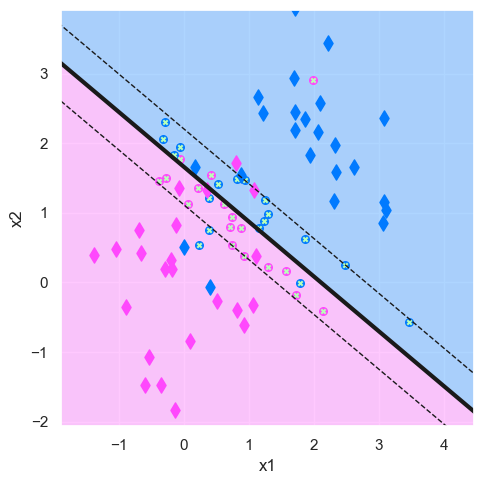

In [13]:
# No necesitamos entrenar el modelo porque con el parámetro refit de GridSearchCV ya lo entrenó por nosotros
svm_best = grid.best_estimator_

plot_boundary(svm_best.support_vectors_, y_train[svm_best.support_], svm_best, 
              step_x=(0.01, 0.01),
              max_x=(1, 1),
              min_x=(-1.5, -1.5),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=30)

# Grafiquemos los vectores de soporte
plt.scatter(svm_best.support_vectors_[:,0], svm_best.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X_train, svm_best)

# Graficamos el set de testeo
plt.scatter(X_test[:25,0], X_test[:25,1], c="#ff48fd", marker="d", s=60)
plt.scatter(X_test[25:,0], X_test[25:,1], c="#007aff", marker="d", s=60)

plt.tight_layout();

Evaluamos usando la matriz de confusión

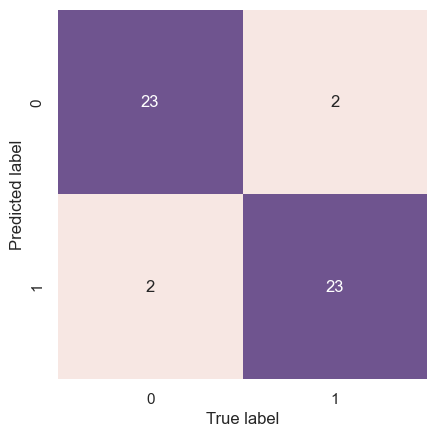

In [14]:
from sklearn.metrics import confusion_matrix

y_pred = svm_best.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=svm_best.classes_)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5))
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [15]:
from sklearn.metrics import accuracy_score

print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")

El porcentaje de exactitud es de: 92%


## Uso de funciones Kernels

Veamos ahora cuando clasificamos con un modelo con una frontera de decision no lineal usando una funcion kernel. 

Empezamos con la función kernel polinomica, que tenemos como hiperparámetro, además de la C, el orden del polinomio, que en [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) se pasa como  el argumento **gamma**. 

Pero, vamos a realizar primero una busqueda de posibles hiperparametro, tanto para C como para gamma usando **gridsearchCV**

In [16]:
svm_poly = SVC(kernel='poly')

grid = GridSearchCV(svm_poly,
                    {'C': [1, 5, 10], 'degree': [2, 3, 4, 5]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [1, 5, 10], 'degree': [2, 3, 4, 5]},
             scoring='accuracy')

In [17]:
# Vemos todos los datos de la busqueda como Dataframe que nos facilita la visualizacion
pd.DataFrame(grid.cv_results_).sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,0.000436,0.000058,0.000239,0.000009,10,3,"{'C': 10, 'degree': 3}",0.900,0.950,1.000,0.950,0.900,0.940,0.037417,1
1,0.000363,0.000033,0.000245,0.000008,1,3,"{'C': 1, 'degree': 3}",0.875,0.950,1.000,0.950,0.900,0.935,0.043589,2
5,0.000387,0.000044,0.000240,0.000006,5,3,"{'C': 5, 'degree': 3}",0.875,0.950,1.000,0.950,0.900,0.935,0.043589,2
7,0.000557,0.000118,0.000243,0.000007,5,5,"{'C': 5, 'degree': 5}",0.850,0.925,0.950,0.950,0.900,0.915,0.037417,4
8,0.000406,0.000019,0.000237,0.000004,10,2,"{'C': 10, 'degree': 2}",0.850,0.900,0.975,0.925,0.925,0.915,0.040620,4


Los mejores parámetros encontrados fueron:

In [18]:
grid.best_params_

{'C': 10, 'degree': 3}

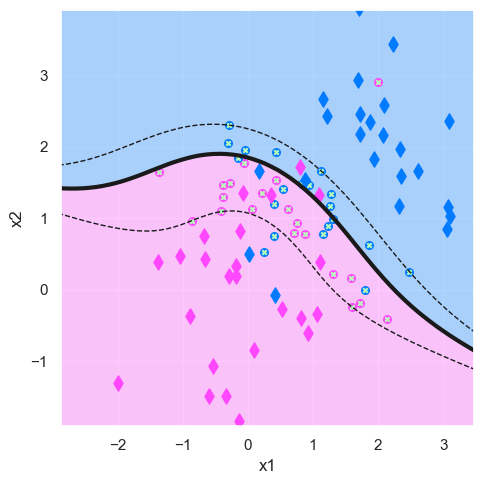

In [19]:
svm_poly_best = grid.best_estimator_

plot_boundary(svm_poly_best.support_vectors_, y_train[svm_poly_best.support_], svm_poly_best, 
              step_x=(0.01, 0.01),
              max_x=(1, 1),
              min_x=(-1.5, -1.5),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=30)

# Grafiquemos los vectores de soporte
plt.scatter(svm_poly_best.support_vectors_[:,0], svm_poly_best.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X_train, svm_poly_best)

# Graficamos el set de testeo
plt.scatter(X_test[:25,0], X_test[:25,1], c="#ff48fd", marker="d", s=60)
plt.scatter(X_test[25:,0], X_test[25:,1], c="#007aff", marker="d", s=60)

plt.tight_layout();

In [20]:
y_pred = svm_poly_best.predict(X_test)

print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")

El porcentaje de exactitud es de: 90%


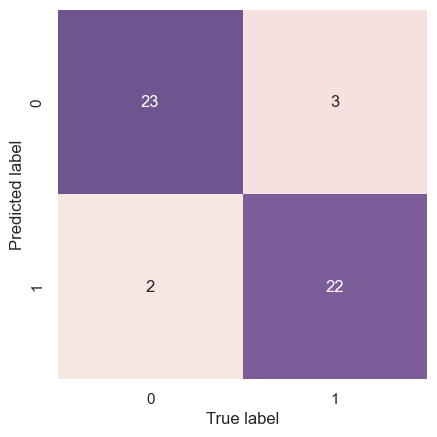

In [21]:
cm = confusion_matrix(y_test, y_pred, labels=svm_poly_best.classes_)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5))
plt.xlabel('True label')
plt.ylabel('Predicted label');

Otro tipo de función de kernel que vimos es la radial, habiamos visto en clase que teniamos el hiperparámetro gamma. Si usamos esta función en [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function), podemos pasar el argumento como **gamma**, al igual que el caso de kernel polinomial.

In [22]:
svm_kbf = SVC(kernel='rbf')

grid = GridSearchCV(svm_kbf,
                    {"C": [0.001, 0.01, 0.1, 1, 5, 10, 100],
                     "gamma": [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4]},
                    refit=True,
                    cv=5,
                    scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 4]},
             scoring='accuracy')

In [23]:
grid.best_params_

{'C': 5, 'gamma': 0.1}

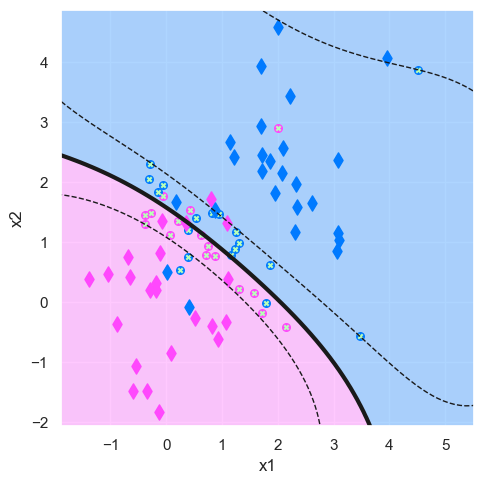

In [24]:
svm_rbf_best = grid.best_estimator_

plot_boundary(svm_rbf_best.support_vectors_, y_train[svm_rbf_best.support_], svm_rbf_best, 
              step_x=(0.01, 0.01),
              max_x=(1, 1),
              min_x=(-1.5, -1.5),
              colormap_frontier=('#ffb7fe', '#93c7ff'),
              colormap_points=('#ff48fd', '#007aff'),
              figsize=(5, 5),
              legend=False,
              point_size=30)

# Grafiquemos los vectores de soporte
plt.scatter(svm_rbf_best.support_vectors_[:,0], svm_rbf_best.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X_train, svm_rbf_best, max_x=(1, 1), min_x=(-1.5, -1.5))

# Graficamos el set de testeo
plt.scatter(X_test[:25,0], X_test[:25,1], c="#ff48fd", marker="d", s=60)
plt.scatter(X_test[25:,0], X_test[25:,1], c="#007aff", marker="d", s=60)

plt.tight_layout();

In [25]:
y_pred = svm_rbf_best.predict(X_test)

print(f"El porcentaje de exactitud es de:{accuracy_score(y_test, y_pred)*100: .0f}%")

El porcentaje de exactitud es de: 92%


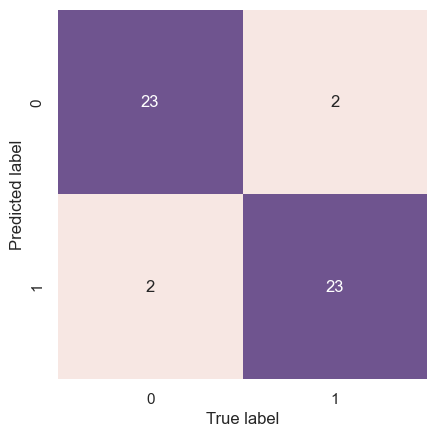

In [26]:
cm = confusion_matrix(y_test, y_pred, labels=svm_rbf_best.classes_)

sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5))
plt.xlabel('True label')
plt.ylabel('Predicted label');

----

## Clasificación de multi-clase con SVM

El modelo [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.decision_function) implementado por sklearn nos permite realizar clasificacion de multiclase en cualquier de los dos clases que vimos en clase. Para ello tenemos el atributo *decision_function_shape* que puede tomar dos formas:

- 'ovo': Estrategia One vs one
- 'ovr': Estrategia One vs rest (One vs all).

Creemos una data sintetica para este caso:

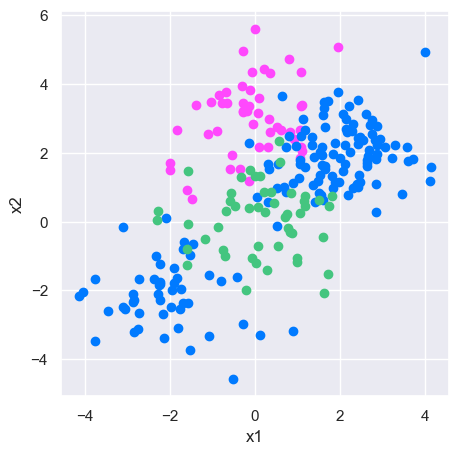

In [27]:
rng = np.random.default_rng(42)

X = rng.standard_normal((200, 2)) 
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

X = np.vstack([X, rng.standard_normal((50, 2))]) 
y = np.hstack([y, [0]*50])
X[y==0,1] += 3

fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(X[y==0][:,0], X[y==0][:,1], c="#ff48fd")
ax.scatter(X[y==1][:,0], X[y==1][:,1], c="#007aff")
ax.scatter(X[y==2][:,0], X[y==2][:,1], c="#44c57f")
ax.set_xlabel("x1")
ax.set_ylabel("x2");

Entrenamos el modelo con un kernel RBF y una estrategia one-vs-one

In [28]:
svm_rbf_3 = SVC(kernel="rbf", C=1, gamma=0.1, decision_function_shape='ovo', probability=True); 
svm_rbf_3.fit(X, y)

SVC(C=1, decision_function_shape='ovo', gamma=0.1, probability=True)

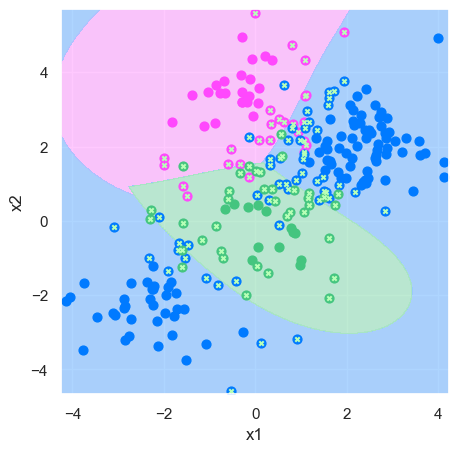

In [29]:
plot_boundary(X, y, svm_rbf_3, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff', "#a9e5c5"),
              colormap_points=('#ff48fd', '#007aff', "#44c57f"),
              label_point=(0, 1, 2),
              figsize=(5, 5),
              legend=False,
              point_size=40)

# Grafiquemos los vectores de soporte
plt.scatter(svm_rbf_3.support_vectors_[:,0], svm_rbf_3.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

Para entender como se arman las zonas de decisión, veamos las fronteras de decisión:

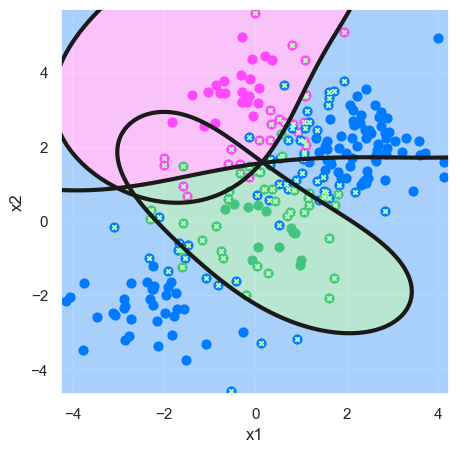

In [30]:
plot_boundary(X, y, svm_rbf_3, 
              step_x=(0.01, 0.01),
              max_x=(0.1, 0.1),
              min_x=(-0.1, -0.1),
              colormap_frontier=('#ffb7fe', '#93c7ff', "#a9e5c5"),
              colormap_points=('#ff48fd', '#007aff', "#44c57f"),
              label_point=(0, 1, 2),
              figsize=(5, 5),
              legend=False,
              point_size=40)

# Grafiquemos los vectores de soporte
plt.scatter(svm_rbf_3.support_vectors_[:,0], svm_rbf_3.support_vectors_[:,1], marker="x", color="#b8ffb7", s=10);

# Graficamos los bordes de decision
plot_svm_margins(X, svm_rbf_3, linewidths=[0, 3, 0])

----

## Reconociendo caras

Como ejemplo del funcionamiento de SVC, veamos un problema de reconocimiento facial. Utilizaremos el dataset [Labeled Faces in the Wild](https://vis-www.cs.umass.edu/lfw/), que consiste en miles de fotos de diversas figuras públicas. Scikit-Learn la incluye en su libreria.

OBS: Para este ejercicio, nos basamos del libro [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) - Jake VanderPlas 

In [31]:
from sklearn.datasets import fetch_lfw_people

# Para trabajar con este dataset, vamos a usar personas con mas de 60 fotos
faces = fetch_lfw_people(min_faces_per_person=60)

In [32]:
faces.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Junichiro Koizumi',
       'Tony Blair'], dtype='<U17')

In [33]:
faces.images.shape

(1348, 62, 47)

Grafiquemos algunas de las fotos:

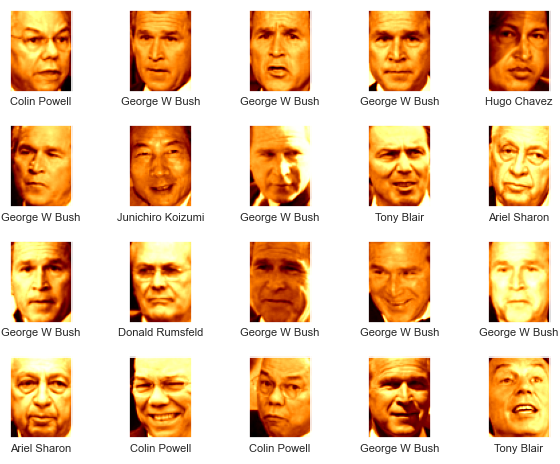

In [34]:
fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='afmhot')
    axi.set(xticks=[], yticks=[],
            xlabel=(faces.target_names[faces.target[i]]))
    axi.xaxis.label.set_size(8) 
plt.tight_layout()

Cada imagen tiene dimensiones [62×47], lo que equivale aproximadamente a 3,000 píxeles.

Una forma de trabajar con las imágenes es utilizar cada píxel como un atributo, pero vamos a aplicar reducción de dimensionalidad para extraer las características más significativas y así reducir el número de componentes a 150, lo cual facilitará su manejo. Utilizaremos el análisis de componentes principales (PCA). 

En esta materia no llegamos a ver PCA, pero en resumen, es una técnica para simplificar conjuntos de datos complejos. Supongamos que se tiene muchos atributos que describen algo, como por ejemplo el brillo de cada píxel. PCA nos ayuda a reducir la cantidad de estas características mientras intentamos mantener la mayor cantidad de información importante posible.

PCA busca nuevas direcciones o ejes en los datos, llamados componentes principales, donde la variación de los datos es máxima. Esto significa que los primeros componentes principales capturan la mayor parte de la variabilidad en los datos originales. Luego, PCA proyecta nuestros datos originales (por ejemplo, los valores de brillo de cada píxel en una imagen) en estos nuevos componentes principales.

![](./componentes_principales.png)

¿Por qué es útil? Al reducir la dimensionalidad de los datos con PCA, podemos trabajar con menos información pero aún así capturar las tendencias generales y patrones importantes de los datos originales. Esto hace que sea más fácil y rápido trabajar con grandes conjuntos de datos, como en el reconocimiento de patrones o en la clasificación de imágenes.

En resumen, PCA es como encontrar las direcciones más importantes en los datos para poder simplificarlos y entenderlos mejor, sin perder demasiada información clave, es una técnica de compresión de datos con perdida.

In [35]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True)
svc = SVC(class_weight='balanced')
model = make_pipeline(pca, svc)

Separemos el dataset:

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

Hagamos una búsqueda de hiper-parámetros para encontrar cual es la mejor combinación:

In [37]:
# Observen que dado que tenemos un pipeline, ahora para la busqueda pasamos el nombre del modelo + __ + el parámetro
param_grid = [
    {'svc__kernel': ['linear'], 'svc__C': [1, 5, 10, 50]},
    {'svc__kernel': ['poly'], 'svc__C': [1, 5, 10], 'svc__degree': [2, 3, 4, 5]},
    {'svc__kernel': ['rbf'], 'svc__C': [1, 5, 10, 50, 75, 100], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
]
grid = GridSearchCV(model, param_grid)

grid.fit(X_train, y_train)
print(grid.best_params_)

/Users/facundolucianna/Library/Caches/pypoetry/virtualenvs/apre-aut-ceiot-PH_AokOi-py3.10/lib/python3.10/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'svc__C': 50, 'svc__gamma': 0.005, 'svc__kernel': 'rbf'}


Con el mejor modelo encontrado, podemos ver como rinde el modelo:

In [38]:
model_faces = grid.best_estimator_
y_pred = model_faces.predict(X_test)

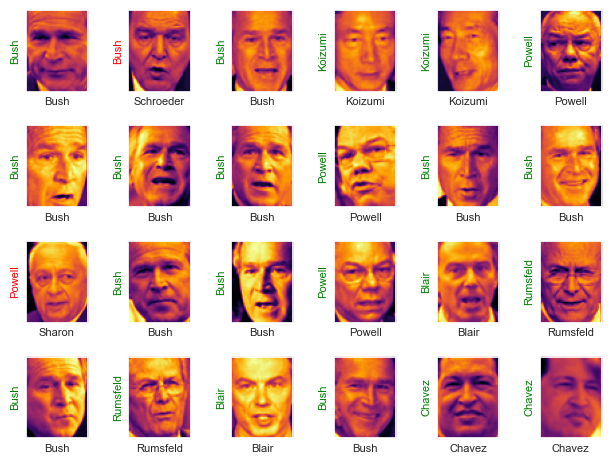

In [39]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(62, 47), cmap='inferno')
    axi.set(xticks=[], yticks=[],
            xlabel=(faces.target_names[y_test[i]].split()[-1]))
    axi.set_ylabel(faces.target_names[y_pred[i]].split()[-1],
                   color='green' if y_pred[i] == y_test[i] else 'red')
    axi.xaxis.label.set_size(8) 
    axi.yaxis.label.set_size(8)
plt.tight_layout()

Podemos tener una mejor idea del rendimiento de modelo utilizando el informe de clasificación, que lista las estadísticas de clasificación:

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.80      0.86        15
     Colin Powell       0.82      0.88      0.85        68
  Donald Rumsfeld       0.88      0.71      0.79        31
    George W Bush       0.82      0.95      0.88       126
Gerhard Schroeder       1.00      0.61      0.76        23
      Hugo Chavez       1.00      0.65      0.79        20
Junichiro Koizumi       1.00      0.92      0.96        12
       Tony Blair       0.88      0.88      0.88        42

         accuracy                           0.86       337
        macro avg       0.92      0.80      0.84       337
     weighted avg       0.87      0.86      0.85       337



O la matriz confusión:

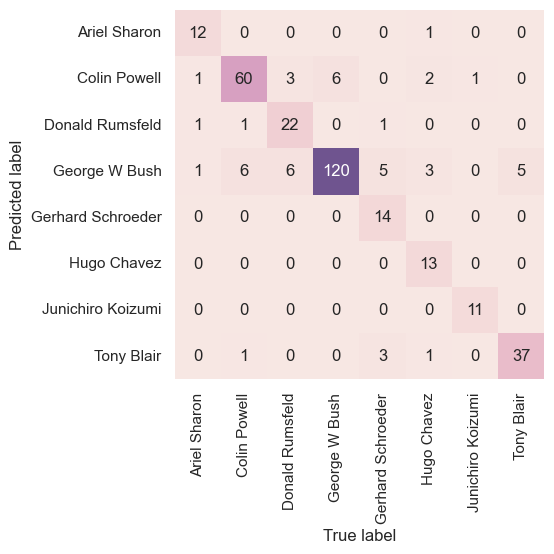

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names,
            cmap=sns.cubehelix_palette(as_cmap=True, gamma=.5))
plt.xlabel('True label')
plt.ylabel('Predicted label');